# SFO Crime Dataset depolyed by Nandini Lokesh Reddy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Read data

In [2]:
df=pd.read_csv("Police_Department_Incident_Reports__2018_to_Present_20240512.csv")

In [3]:
df.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/03/13 11:41:00 PM,2023/03/13,23:41,2023,Monday,2023/03/13 11:41:00 PM,125373607041,1253736.0,230167874.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795.0,236046151.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/03/13 01:16:00 PM,2023/03/13,13:16,2023,Monday,2023/03/13 01:17:00 PM,125357107041,1253571.0,220343896.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551.0,230174885.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024.0,230176728.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District',
       'Supervisor District 2012', 'Latitude', 'Longitude', 'Point',
       'Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts'],
      dtype='object')

In [5]:
df.iloc[:,-8:]

,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
14897,40.0,NaN,NaN,NaN,NaN,NaN,7.0,10.0
14898,15.0,NaN,NaN,NaN,NaN,NaN,6.0,4.0
14899,17.0,NaN,NaN,NaN,NaN,NaN,6.0,4.0
14900,97.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0


##### Data Cleaning

In [6]:
new_df = df.drop(columns=['Incident Datetime','Row ID','Incident Number','Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts','Intersection','CNN','Supervisor District',
       'Supervisor District 2012','Report Datetime'])

In [7]:
def replace_similar_categories(df, mapping):
    df['Incident Category'] = df['Incident Category'].replace(mapping)
    return df


category_mapping = {
    'Robbery': 'theft',
    'Embezzlement': 'theft',
    'Other Miscellaneous': 'Other',
    'Miscellaneous Investigation':'Other',
    'Other Offenses':'Other',
    'Human Trafficking (A), Commercial Sex Acts':'Sex Offense',
    'Human Trafficking, Commercial Sex Acts':'Sex Offense',
    'Motor Vehicle Theft?':'Motor Vehicle Theft',
    'Weapons Offence':'Weapons Offense',
    'Rape':'Sex Offense',
    'Human Trafficking-Sex Acts':'Sex Offense'

}


new_df = replace_similar_categories(new_df, category_mapping)


In [8]:
def add_crime_column(df, crime_values):
    """
    Adds a new column 'crime' to the DataFrame indicating whether each incident is a crime or not.

    Args:
        df (DataFrame): The DataFrame containing the incident categories.
        crime_values (list): A list of values indicating crime categories.

    Returns:
        DataFrame: The DataFrame with the 'crime' column added.
    """

    new_df['crime'] = df['Incident Category'].isin(crime_values).astype(int)

    return df

crime_values = ['Larceny Theft', 'Other', 'Offences Against The Family And Children', 'Traffic Violation Arrest','Malicious Mischief','Assault',
                'Burglary','Motor Vehicle Theft','Fraud','Drug Offense','theft','Suspicious Occ','Disorderly Conduct','Weapons Offense',
                'Forgery And Counterfeiting','Arson','Vandalism','Sex Offense','Prostitution','Drug Violation','Homicide','Gambling','Human Trafficking (B), Involuntary Servitude']
new_df = add_crime_column(new_df, crime_values)


In [9]:
new_df.head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident ID,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Police District,Analysis Neighborhood,Latitude,Longitude,Point,crime
0,2023/03/13,23:41,2023,Monday,1253736.0,NaN,VS,Vehicle Supplement,NaN,7041.0,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,Out of SF,NaN,NaN,NaN,NaN,0
1,2023/03/01,05:02,2023,Wednesday,1253795.0,NaN,II,Coplogic Initial,True,6374.0,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,Mission,NaN,NaN,NaN,NaN,1
2,2023/03/13,13:16,2023,Monday,1253571.0,NaN,VS,Vehicle Supplement,NaN,7041.0,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,Out of SF,NaN,NaN,NaN,NaN,0
3,2023/03/13,10:59,2023,Monday,1253551.0,NaN,VS,Vehicle Supplement,NaN,7041.0,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,Out of SF,NaN,NaN,NaN,NaN,0
4,2023/03/14,18:44,2023,Tuesday,1254024.0,NaN,VS,Vehicle Supplement,NaN,7041.0,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,Out of SF,NaN,NaN,NaN,NaN,0


##### Visualizations

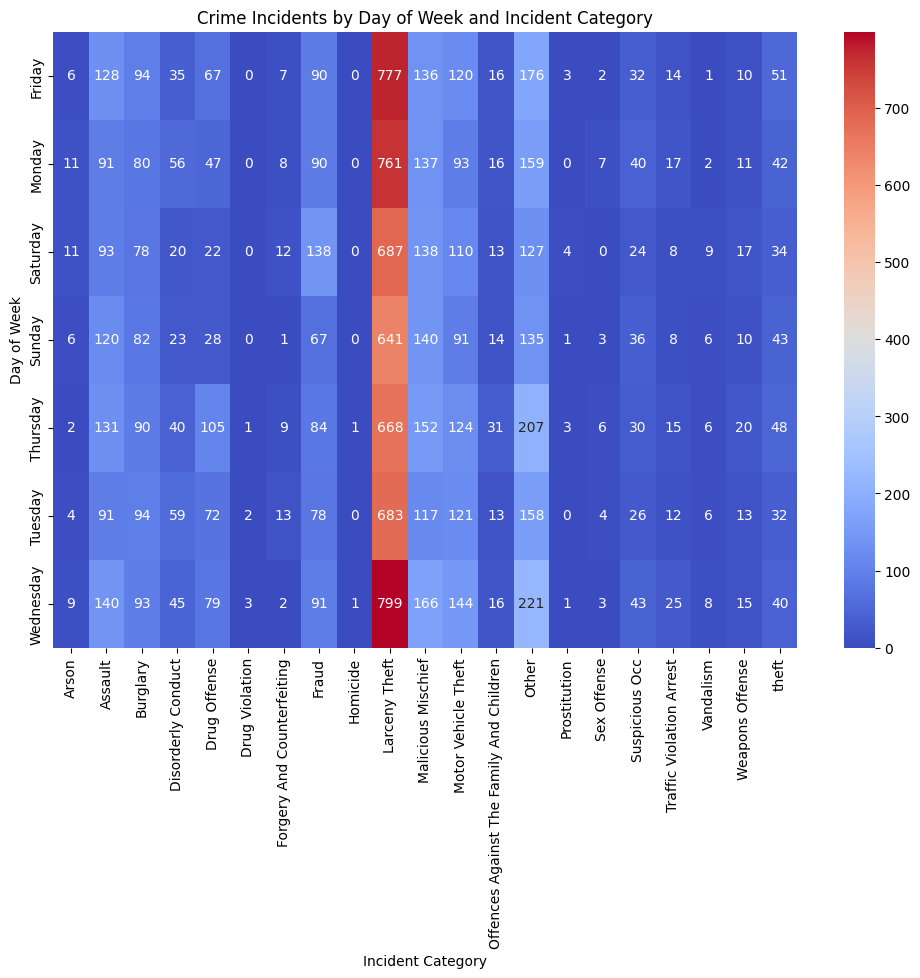

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_crime_day(df):
    """
    Visualizes the relationship between 'Incident Day of Week', crime incidents, and incident categories.

    Args:
        df (DataFrame): The DataFrame containing the incident data with the 'crime' column added.

    Returns:
        None
    """
    crime_df = df[df['crime'] == 1]

    pivot_table = crime_df.pivot_table(index='Incident Day of Week', columns='Incident Category', aggfunc='size', fill_value=0)

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d')
    plt.title('Crime Incidents by Day of Week and Incident Category')
    plt.xlabel('Incident Category')
    plt.ylabel('Day of Week')
    plt.show()


visualize_crime_day(new_df)


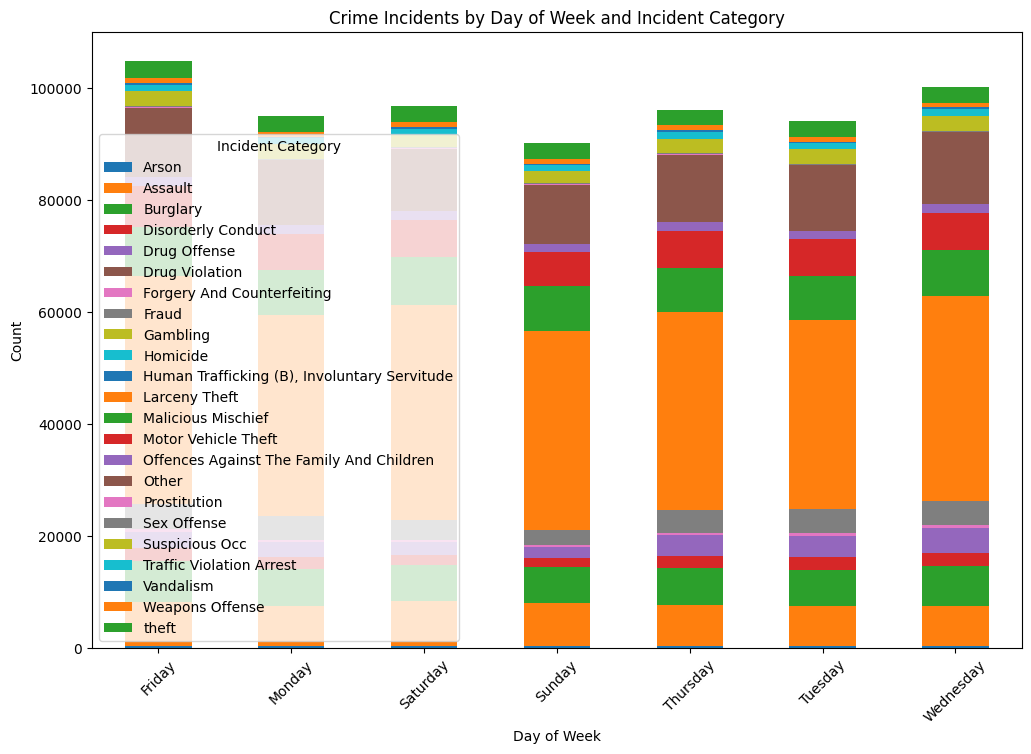

In [ ]:
def visualize_crime_day_bar(df):
    """
    Visualizes the relationship between 'Incident Day of Week', crime incidents, and incident categories using a bar plot.

    Args:
        df (DataFrame): The DataFrame containing the incident data with the 'crime' column added.

    Returns:
        None
    """
    crime_df = df[df['crime'] == 1]

    grouped_df = crime_df.groupby(['Incident Day of Week', 'Incident Category']).size().unstack(fill_value=0)

    grouped_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Crime Incidents by Day of Week and Incident Category')
    plt.xlabel('Day of Week')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Incident Category')
    plt.show()

visualize_crime_day_bar(new_df)


/var/folders/9s/jhct1nvn5w551vq58kr4g2rm0000gn/T/ipykernel_32945/2669723831.py:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Incident Day of Week', y='Incident Category', data=crime_df, scale='count', inner='quartile')


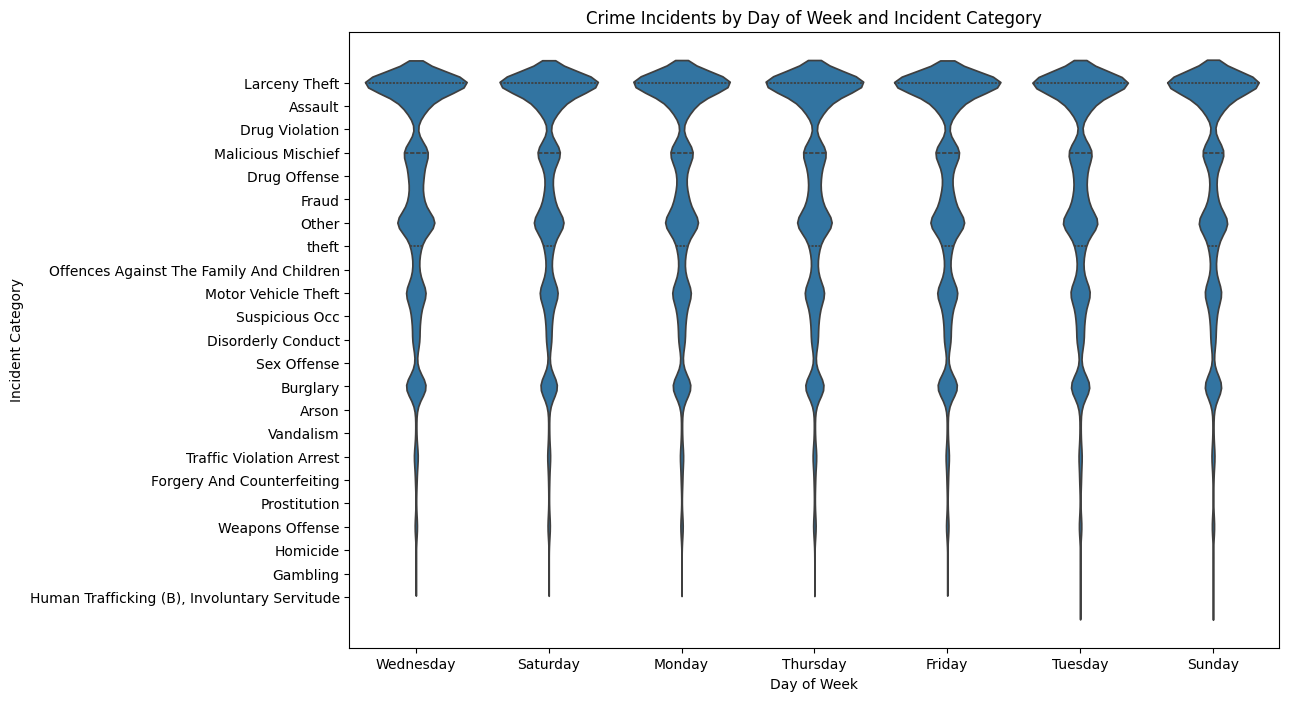

In [ ]:
def visualize_crime_day_violin(df):
    """
    Visualizes the relationship between 'Incident Day of Week', crime incidents, and incident categories using a violin plot.

    Args:
        df (DataFrame): The DataFrame containing the incident data with the 'crime' column added.

    Returns:
        None
    """
    crime_df = df[df['crime'] == 1]

    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Incident Day of Week', y='Incident Category', data=crime_df, scale='count', inner='quartile')
    plt.title('Crime Incidents by Day of Week and Incident Category')
    plt.xlabel('Day of Week')
    plt.ylabel('Incident Category')
    plt.show()

visualize_crime_day_violin(new_df)


In [ ]:
pip install geopandas --quiet


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/9s/jhct1nvn5w551vq58kr4g2rm0000gn/T/ipykernel_32945/1571734979.py:23: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


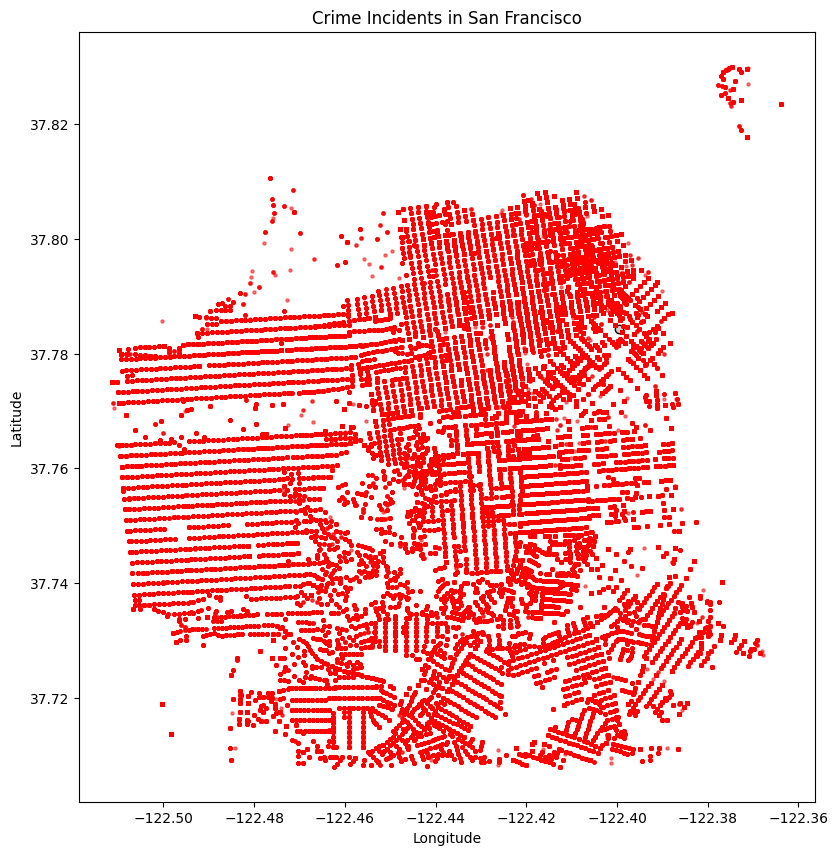

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

def plot_crime_map_geopandas(df):
    """
    Plots crime incidents on a GeoMap of San Francisco (SFO) using latitude and longitude coordinates with GeoPandas.

    Args:
        df (DataFrame): The DataFrame containing latitude, longitude, incident category, and the 'crime' column.

    Returns:
        None
    """
    crime_df = df[(df['crime'] == 1) & (~df['Latitude'].isnull()) & (~df['Longitude'].isnull())]

    geometry = [Point(xy) for xy in zip(crime_df['Longitude'], crime_df['Latitude'])]
    gdf = gpd.GeoDataFrame(crime_df, geometry=geometry, crs="EPSG:4326")

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
    sf_map = world[world.name == "San Francisco"]

    fig, ax = plt.subplots(figsize=(10, 10))
    sf_map.plot(ax=ax, color='lightgray', edgecolor='black')
    gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5)

    plt.title('Crime Incidents in San Francisco')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

plot_crime_map_geopandas(new_df)


/var/folders/9s/jhct1nvn5w551vq58kr4g2rm0000gn/T/ipykernel_32945/1473638407.py:37: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


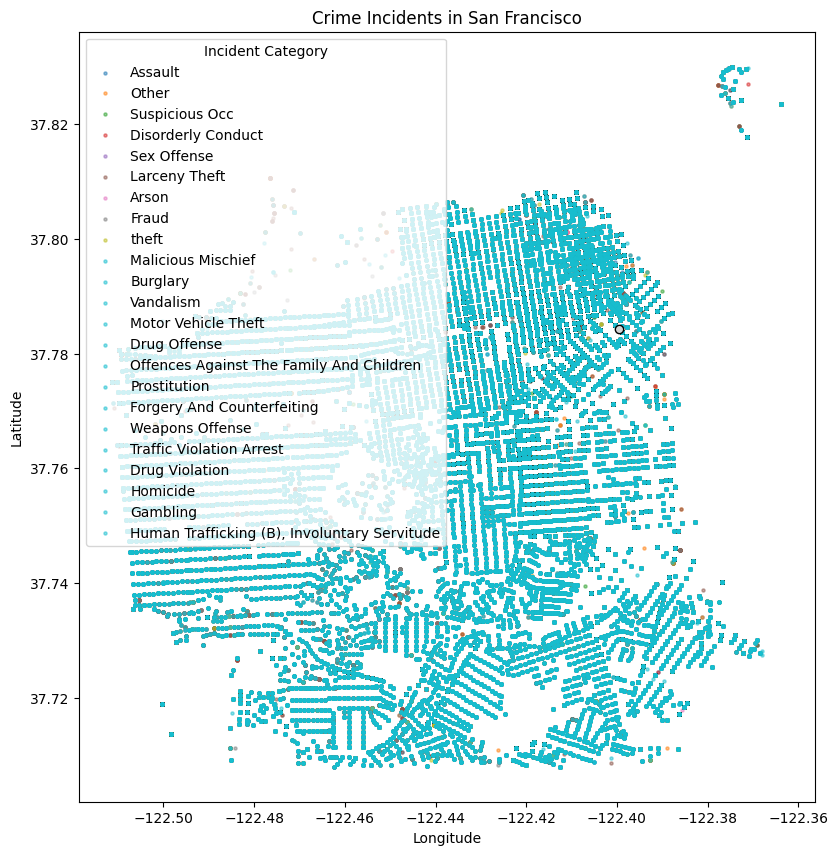

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.colors import ListedColormap

def plot_crime_map_geopandas(df):
    """
    Plots crime incidents on a GeoMap of San Francisco (SFO) using latitude and longitude coordinates with GeoPandas.

    Args:
        df (DataFrame): The DataFrame containing latitude, longitude, incident category, and the 'crime' column.

    Returns:
        None
    """

    crime_df = df[(df['crime'] == 1) & (~df['Latitude'].isnull()) & (~df['Longitude'].isnull())]

    geometry = [Point(xy) for xy in zip(crime_df['Longitude'], crime_df['Latitude'])]
    gdf = gpd.GeoDataFrame(crime_df, geometry=geometry, crs="EPSG:4326")

    unique_categories = gdf['Incident Category'].unique()
    colors = plt.cm.tab10(range(len(unique_categories)))

    category_color_map = {category: color for category, color in zip(unique_categories, colors)}

    fig, ax = plt.subplots(figsize=(10, 10))
    for category, color in category_color_map.items():
        incidents = gdf[gdf['Incident Category'] == category]
        incidents.plot(ax=ax, color=color, markersize=5, alpha=0.5, label=category)

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
    sf_map = world[world.name == "San Francisco"].plot(ax=ax, color='lightgray', edgecolor='black')

    plt.legend(title='Incident Category', loc='upper left')

    plt.title('Crime Incidents in San Francisco')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

plot_crime_map_geopandas(new_df)


In [11]:
pip install scikit-learn --quiet


### K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-44-0670b9107506>:35: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



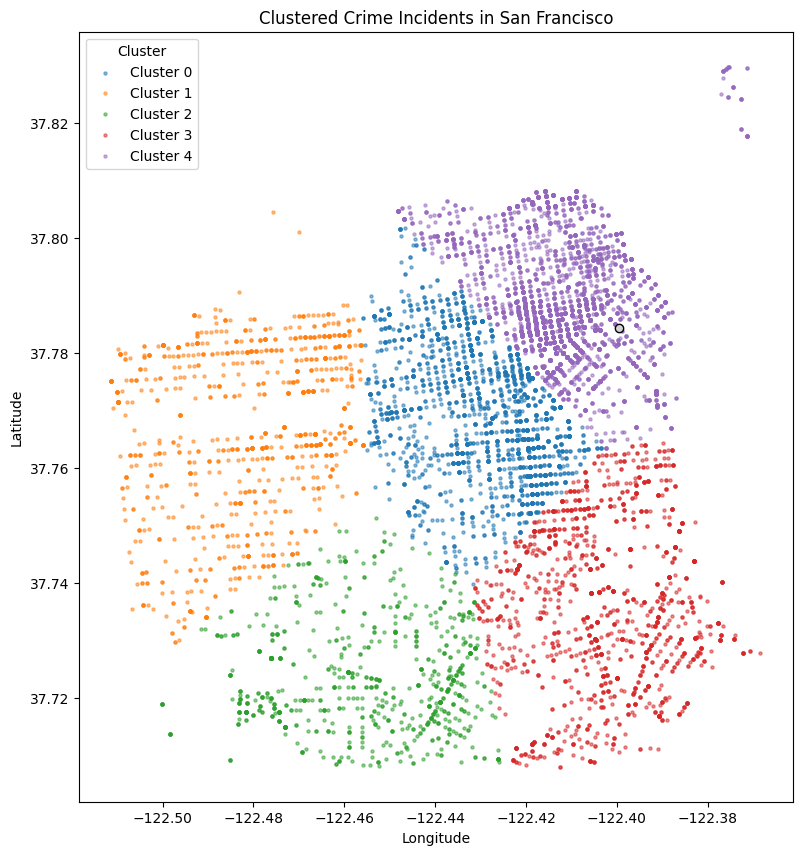

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans

def plot_clustered_crime_map(df, n_clusters=5):
    """
    Plots crime incidents on a GeoMap of San Francisco (SFO) using latitude and longitude coordinates, clustered using K-means.

    Args:
        df (DataFrame): The DataFrame containing latitude, longitude, incident category, and the 'crime' column.
        n_clusters (int): Number of clusters to use for K-means clustering.

    Returns:
        None
    """
    crime_df = df[(df['crime'] == 1) & (~df['Latitude'].isnull()) & (~df['Longitude'].isnull())]

    geometry = [Point(xy) for xy in zip(crime_df['Longitude'], crime_df['Latitude'])]
    gdf = gpd.GeoDataFrame(crime_df, geometry=geometry, crs="EPSG:4326")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    gdf['cluster'] = kmeans.fit_predict(gdf[['Longitude', 'Latitude']])

    cluster_colors = plt.cm.tab10(range(n_clusters))

    cluster_color_map = {cluster: color for cluster, color in zip(range(n_clusters), cluster_colors)}

    fig, ax = plt.subplots(figsize=(10, 10))

    for cluster in range(n_clusters):
        incidents = gdf[gdf['cluster'] == cluster]
        ax.scatter(incidents['Longitude'], incidents['Latitude'], color=cluster_color_map[cluster], label=f'Cluster {cluster}', s=5, alpha=0.5)

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
    world[world.name == "San Francisco"].plot(ax=ax, color='lightgray', edgecolor='black')

    ax.set_title('Clustered Crime Incidents in San Francisco')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    ax.legend(title='Cluster', loc='upper left')

    plt.show()

plot_clustered_crime_map(new_df, n_clusters=5)


# decoding k-means clustering

In [13]:
new_df.isnull().sum()

Incident Date                  0
Incident Time                  0
Incident Year                  0
Incident Day of Week           0
Incident ID                    1
CAD Number                  5454
Report Type Code               1
Report Type Description        1
Filed Online               10297
Incident Code                  1
Incident Category             27
Incident Subcategory          27
Incident Description           1
Resolution                     1
Police District                1
Analysis Neighborhood       2666
Latitude                    2664
Longitude                   2664
Point                       2664
crime                          0
dtype: int64

In [14]:
crime_df = new_df[new_df['crime'] == 1]

In [15]:
crime_df

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident ID,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Police District,Analysis Neighborhood,Latitude,Longitude,Point,crime
1,2023/03/01,05:02,2023,Wednesday,1253795.0,NaN,II,Coplogic Initial,True,6374.0,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,Mission,NaN,NaN,NaN,NaN,1
5,2023/02/15,03:00,2023,Wednesday,1253786.0,NaN,II,Coplogic Initial,True,6372.0,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,Mission,NaN,NaN,NaN,NaN,1
6,2023/03/11,12:30,2023,Saturday,1253816.0,NaN,II,Coplogic Initial,True,6244.0,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,Central,NaN,NaN,NaN,NaN,1
7,2023/03/13,11:26,2023,Monday,1254195.0,NaN,II,Coplogic Initial,True,6244.0,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,Central,NaN,NaN,NaN,NaN,1
8,2023/03/11,15:00,2023,Saturday,1254206.0,NaN,IS,Coplogic Supplement,True,6244.0,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,Central,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14896,2023/08/01,12:00,2023,Tuesday,1315277.0,232482632.0,II,Initial,NaN,9262.0,Forgery And Counterfeiting,Forgery And Counterfeiting,Forgery & Counterfeiting (general),Open or Active,Central,Russian Hill,37.801165,-122.414855,POINT (-122.41485517896831 37.80116517150228),1
14897,2023/09/05,04:30,2023,Tuesday,1315146.0,232480943.0,II,Initial,NaN,5071.0,Burglary,Burglary - Other,"Burglary, Other Bldg., Forcible Entry",Open or Active,Taraval,Sunset/Parkside,37.742956,-122.477836,POINT (-122.47783624417711 37.74295557156525),1
14898,2023/08/03,23:30,2023,Thursday,1314944.0,NaN,II,Coplogic Initial,True,6374.0,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,Northern,Marina,37.797089,-122.435490,POINT (-122.43548982808359 37.797089000192194),1
14899,2023/08/14,17:30,2023,Monday,1314895.0,NaN,II,Coplogic Initial,True,6244.0,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,Northern,Marina,37.803284,-122.446910,POINT (-122.44691011930168 37.80328399631487),1


In [16]:
crime_df = crime_df.drop(columns=['Incident Date','CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code','Incident Subcategory', 'Incident Description',
       'Resolution', 'Police District', 'Analysis Neighborhood','crime'])

In [17]:
crime_df=crime_df.dropna()

In [18]:
crime_df.rename(columns={'Incident Time': 'IncidentTime', 'Incident Year': 'IncidentYear',
                   'Incident Day of Week': 'IncidentDay','IncidentID':'IncidentID','Incident Category':'IncidentCategory'}, inplace=True)

In [19]:
crime_df=crime_df.drop(columns=['Point'])

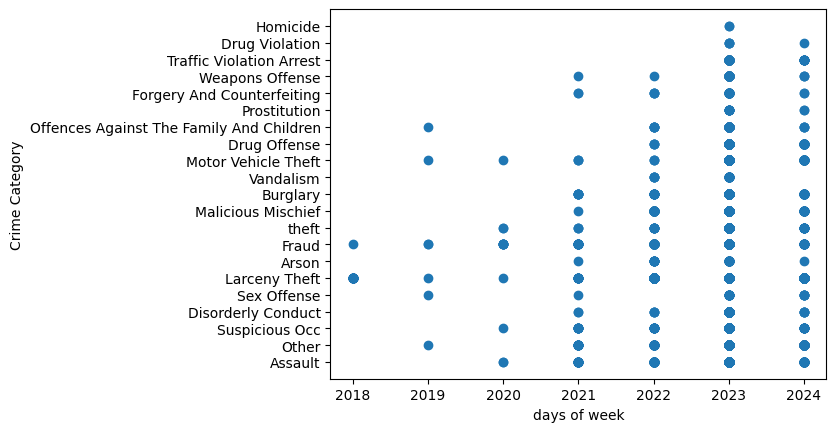

In [20]:
plt.scatter(crime_df['IncidentYear'], crime_df['IncidentCategory'])
plt.xlabel("days of week")
plt.ylabel("Crime Category")
plt.show()

In [21]:
df_2023 = crime_df[crime_df['IncidentYear'] == 2023]
df_2023

,IncidentTime,IncidentYear,IncidentDay,Incident ID,IncidentCategory,Latitude,Longitude
9,14:00,2023,Saturday,1254318.0,Assault,37.772895,-122.454285
13,17:30,2023,Thursday,1254826.0,Assault,37.762290,-122.401324
1657,09:00,2023,Thursday,1240714.0,Disorderly Conduct,37.749830,-122.431717
1692,00:30,2023,Saturday,1245765.0,Assault,37.787757,-122.420116
1837,10:45,2023,Sunday,1241579.0,theft,37.789110,-122.417017
...,...,...,...,...,...,...,...
14895,21:25,2023,Monday,1314802.0,Other,37.796186,-122.398152
14896,12:00,2023,Tuesday,1315277.0,Forgery And Counterfeiting,37.801165,-122.414855
14897,04:30,2023,Tuesday,1315146.0,Burglary,37.742956,-122.477836
14898,23:30,2023,Thursday,1314944.0,Larceny Theft,37.797089,-122.435490


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_2023[['Longitude']])
df_2023['LongitudeScaled'] = scaler.transform(df_2023[['Longitude']])
scaler.fit(df_2023[['Latitude']])
df_2023['LatitudeScaled'] = scaler.transform(df_2023[['Latitude']])


<ipython-input-22-dc4c25370b95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['LongitudeScaled'] = scaler.transform(df_2023[['Longitude']])
<ipython-input-22-dc4c25370b95>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['LatitudeScaled'] = scaler.transform(df_2023[['Latitude']])


In [23]:
k_range = range(1,15)
list_dist = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df_2023[['LongitudeScaled','LatitudeScaled']])
    list_dist.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

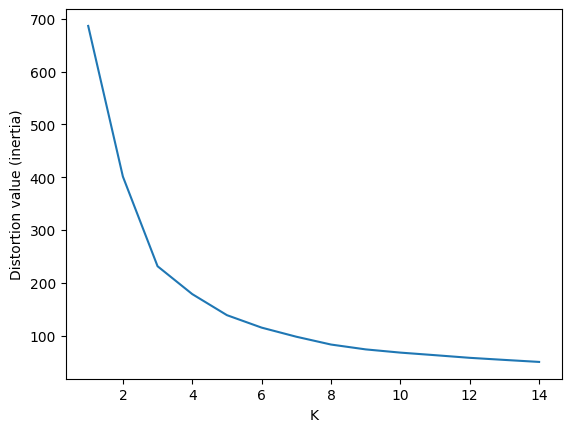

In [24]:
from matplotlib import pyplot as plt

plt.xlabel('K')
plt.ylabel('Distortion value (inertia)')
plt.plot(k_range,list_dist)
plt.show()

In [25]:
model = KMeans(n_clusters=5)


In [26]:
y_predicted = model.fit_predict(df_2023[['LongitudeScaled','LatitudeScaled']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 3, ..., 2, 1, 1], dtype=int32)

In [27]:
df_2023['cluster'] = y_predicted


<ipython-input-27-c9b29e517f0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['cluster'] = y_predicted


In [45]:
df_2023.head()

,IncidentTime,IncidentYear,IncidentDay,Incident ID,IncidentCategory,Latitude,Longitude,LongitudeScaled,LatitudeScaled,cluster
9,14:00,2023,Saturday,1254318.0,Assault,37.772895,-122.454285,0.399047,0.532761,0
13,17:30,2023,Thursday,1254826.0,Assault,37.762290,-122.401324,0.769753,0.445669,3
1657,09:00,2023,Thursday,1240714.0,Disorderly Conduct,37.749830,-122.431717,0.557016,0.343345,3
1692,00:30,2023,Saturday,1245765.0,Assault,37.787757,-122.420116,0.638217,0.654805,1
1837,10:45,2023,Sunday,1241579.0,theft,37.789110,-122.417017,0.659910,0.665920,1


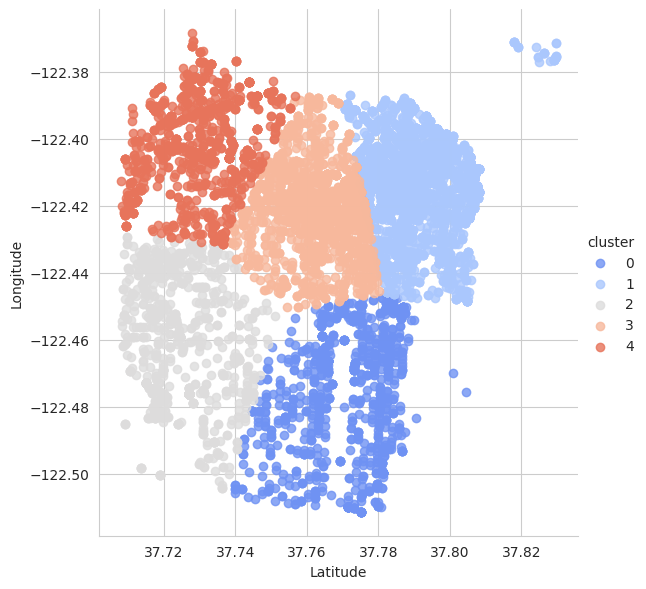

In [46]:
sns.set_style('whitegrid')
sns.lmplot(x='Latitude', y='Longitude', data=df_2023, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg=False)

In [28]:
pip install plotly --quiet

In [31]:
crime_df['IncidentCategory'].nunique()

21

### Clustering based on Latitude and longitude

In [29]:
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import plotly.express as px

def plot_clustered_crime_map(df, n_clusters=5):
    """
    Plots crime incidents on a GeoMap of San Francisco (SFO) using latitude and longitude coordinates, clustered using K-means.

    Args:
        df (DataFrame): The DataFrame containing latitude, longitude, incident category, and the 'crime' column.
        n_clusters (int): Number of clusters to use for K-means clustering.

    Returns:
        None
    """
    crime_df = df[(df['crime'] == 1) & (~df['Latitude'].isnull()) & (~df['Longitude'].isnull())]

    geometry = [Point(xy) for xy in zip(crime_df['Longitude'], crime_df['Latitude'])]
    gdf = gpd.GeoDataFrame(crime_df, geometry=geometry, crs="EPSG:4326")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    gdf['cluster'] = kmeans.fit_predict(gdf[['Longitude', 'Latitude']])

    fig = px.scatter_mapbox(gdf, lat="Latitude", lon="Longitude", color="cluster",
                            color_continuous_scale=px.colors.qualitative.Light24,
                            hover_name="Incident Category",
                            zoom=10)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(title='Clustered Crime Incidents in San Francisco')

    fig.show()


plot_clustered_crime_map(new_df, n_clusters=5)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd

def plot_clustered_crime_map(df, n_clusters=5):
    """
    Plots crime incidents on a GeoMap of San Francisco (SFO) using latitude and longitude coordinates, clustered using K-means.

    Args:
        df (DataFrame): The DataFrame containing latitude, longitude, incident category, and the 'crime' column.
        n_clusters (int): Number of clusters to use for K-means clustering.

    Returns:
        None
    """
    crime_df = df[(df['crime'] == 1) & (~df['Latitude'].isnull()) & (~df['Longitude'].isnull())]

    geometry = [Point(xy) for xy in zip(crime_df['Longitude'], crime_df['Latitude'])]
    gdf = gpd.GeoDataFrame(crime_df, geometry=geometry, crs="EPSG:4326")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    gdf['cluster'] = kmeans.fit_predict(gdf[['Longitude', 'Latitude']])

    incident_counts = gdf.groupby(['cluster', 'Incident Category']).size().reset_index(name='Incident Count')

    pivot_table = incident_counts.pivot(index='cluster', columns='Incident Category', values='Incident Count').fillna(0)

    fig = px.imshow(pivot_table, labels=dict(x="Incident Category", y="Cluster", color="Incident Count"),
                    x=pivot_table.columns, y=pivot_table.index, color_continuous_scale='viridis',
                    title='Incident Counts by Cluster and Category', aspect='auto')
    fig.show()


plot_clustered_crime_map(new_df, n_clusters=5)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### using additional features like time, date, and day

In [41]:
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import pandas as pd

def preprocess_time(df):
    """Preprocesses the 'Incident Time' feature by extracting the hour of the day.

    Args:
        df (DataFrame): The DataFrame containing the 'Incident Time' feature.

    Returns:
        DataFrame: The DataFrame with the 'Incident Time' feature preprocessed.
    """
    df['Incident Time'] = pd.to_datetime(df['Incident Time'], format='%H:%M').dt.hour
    return df

def plot_clustered_crime_map(df, n_clusters=5):
    """Plots crime incidents on a GeoMap of San Francisco (SFO) using latitude and longitude coordinates, clustered using K-means based on various features.

    Args:
        df (DataFrame): The DataFrame containing latitude, longitude, incident category, and additional features like Incident Time, Incident Year, and Incident Day of Week.
        n_clusters (int): Number of clusters to use for K-means clustering.

    Returns:
        None
    """

    features = ['Latitude', 'Longitude', 'Incident Time', 'Incident Year', 'Incident Day of Week']

    crime_df = df[(df['crime'] == 1) & (~df[features].isnull().any(axis=1))]

    crime_df = preprocess_time(crime_df)

    geometry = [Point(xy) for xy in zip(crime_df['Longitude'], crime_df['Latitude'])]

    gdf = gpd.GeoDataFrame(crime_df, geometry=geometry, crs="EPSG:4326")

    gdf = pd.concat([gdf, pd.get_dummies(gdf['Incident Day of Week'], prefix='DayOfWeek')], axis=1)

    clustering_features = ['Latitude', 'Longitude', 'Incident Time', 'Incident Year'] + \
                          [col for col in gdf.columns if 'DayOfWeek_' in col]

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    gdf['cluster'] = kmeans.fit_predict(gdf[clustering_features])

    fig = px.scatter_mapbox(gdf, lat="Latitude", lon="Longitude", color="cluster",
                            color_continuous_scale=px.colors.qualitative.Light24,
                            hover_name="Incident Category", zoom=10)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(title='Clustered Crime Incidents in San Francisco')
    fig.show()

plot_clustered_crime_map(new_df, n_clusters=5)


<ipython-input-41-9eba659c95bc>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

